<table>
    <tr>
        <td>
            <h1>NLP et Espace Vectoriel</h1>
        </td>
    </tr>
</table>


<center><i>Réalisé par : </i>Douba JAFUNO </center>

<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Modèle spatiaux vectoriel</h1></a><br>
           &nbsp; <a href="#wbw">I.1 Word by Word</a><br>
           &nbsp; <a href="#wbd">I.2 Word by document</a><br>
           &nbsp; <a href="#de">I.3 Distance euclidienne</a><br>     
           &nbsp; <a href="#sc">I.4 Similitude des cosinus</a><br>
           &nbsp; <a href="#mvm">I.5 Manipuler la vectorisation de mots (Word embedding) sur les capitales</a><br>
           &ensp; <a href="#cd1">I.5.1 Chargement des données</a><br>
           &ensp; <a href="#tc">I.5.2 Trouver les capitales</a><br>     
           &nbsp; <a href="#acp">I.6 ACP</a><br><br>
           


<a href="#2"><h1>II. Traduction de mot</h1></a><br><br>
    &nbsp; <a href="#tc">II.1 Matrices de Word embedding</a><br>
    &nbsp; <a href="#ec">II.2 Autour des données de word embedding anglais et français</a><br>
    &ensp; <a href="#cd2">II.2.1 Chargement des données</a><br>
    &ensp; <a href="#cmwe">II.2.2 Chargement des matrices de word embedding</a><br>
    &ensp; <a href="#gmtnf">II.2.3 Générer la matrice de transformation avec la norme de Frobenius</a><br>
    &ensp; <a href="#kt">II.2.4 KNN et tests</a><br><br>

  

<a href="#3"><h1>III. Matrice et Vecteur de documents (tweets)</h1></a><br><br>
    &nbsp; <a href="#vd">III.1 Vecteur de document</a><br>
    &nbsp; <a href="#idt">III.2 Importation des données de tweets</a><br>
    &nbsp; <a href="#cmddt">III.3 Construction de la matrice de document avec les données de tweets</a><br>
    &nbsp; <a href="#ttsasc">III.2.2 Trouver les tweets similaires avec la similarité cosinus</a><br><br>



<a href="#4"><h1>IV. Hachage sensible à la localité (HSL)</h1></a><br><br>
    &nbsp; <a href="#fh">IV.1 Fonction de Hachage</a><br>
    &nbsp; <a href="#fhm">IV.2 Fonction de Hachage multiplan</a><br>
    &ensp; <a href="#lhdev">IV.2.1 Les hyperplans dans les espaces vectoriels</a><br>
    &ensp; <a href="#uhdev">IV.2.2 Utilisation des hyperplans pour diviser l'espace vectoriel</a><br>
    &nbsp; <a href="#vhpp">IV.3 Valeur de hachage avec plusieurs plans</a><br>
    &nbsp; <a href="#pa">IV.4 Plans aléatoires</a><br>
    &nbsp; <a href="#ttpsh">IV.5 Trouver les tweets les plus similaires avec le HSL</a><br>
    &ensp; <a href="#cnp">IV.5.1 Choisir le nombre de plans</a><br>
    &ensp; <a href="#ovhv">IV.5.2 Obtenir la valeur de hachage d'un vecteur</a><br>
    &ensp; <a href="#cth">IV.5.3 Création d'une table de hachage</a><br>
    &ensp; <a href="#ctth">IV.5.4 Création de toutes les tables de hachage</a><br>
    &ensp; <a href="#akuh">IV.5.5 Avec KNN en utilisant HSL</a><br><br>

<a href="#5"><h1>V. Référence </h1></a><br><br>
   </td>
    <td style="width: 0%">
    </td>
</tr>
</table>


In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_vectors

In [2]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

243

In [3]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


# <a name="1">I. Modèle spatiaux vectoriel</a>

Les Modèle spatiaux vectoriel: 

$\bullet$ Vont nous aider par rapport aux significations des phrases :
- where are you heading? ou allez vous   et   were are you from?   d'ou venez vous, ont une signification différente
- What are you age ? et How old are you ?   ont une meme signification

$\bullet$ Vont capturer la dépendance entre les mots 
- You eat cereal from a bowl  (cereal , bowl)
- You buy something and someone else sells it (buy,sells)

$\bullet$ Vont trouver les similitudes des mots dans un espace vectoriel 


$\bullet$ Vont trouver les similitudes des mots dans un espace vectoriel 

## <a name="wbw"> Word by Word </a>

Pour obtenir un modele spatiaux vectoriel, On va créer une `Matrice de Coocurrence`: comment trouver les similitudes des mots dans un espaces vectoriel:  on désigne un paramètre k qui est la distance entre 2 mots dans une phrase.

I like **simple data**. (distance d'un mot, k=1)

I prefer **simple** raw **data**. (distance de 2 mots, k=2)



On fait la matrice co-occurence pour le mot data avec k = 2 pour le mot si pour 2 mots k >2 alors leur coefficient dans la matrice de co-occurence vaudra 0, ici on considère que prefer n'est pas dans notre vocabulaire, en effet cette matrice ne concernera que les mots du vocabulaire 

## <a name="wbd"> Word by document </a>

On utilisera une matrice de Coocurrence avec cette fois ci le nombre de fois que les mots du vocabulaire apparaissent dans des documents qui appartiennent à des catégories spécifiques 

Les coefficients représentent le nombre d'apparition d'un mot dans un document spécifique on parle de taux de similarité 

<img src="images/MSV1.png" style="width:700px;height:400;">


ML est plus proche de data quand entertainement est plus proche de film

## <a name="de"> Distance euclidienne</a>



Pour calculer la similarité entre deux vecteurs $A=(A_1,A_2,...A_n)$ et $B= (B_1,B_2....B_n)$ on utilise la distance euclidienne entre un point .
La distance euclidienne est définie comme suit : 

$$\begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

<img src="images/euc_dist.png" style="width:700px;height:400;">

Entrainement correpond au corpus A(500,7000)
ML au corpus B(9320,100)
alors $d(A,B)=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}}=\sqrt{\left(-8820\right)^{2}+\left(6000\right)^{2}}\approx 10667$

la distance euclidienne entre $u_t$ et $v_t$ pour data et boba est $$d(u_t, v_t)=\sqrt{\left(6-0\right)^{2}+\left(0-4\right)^{2}+\left(0-6\right)^{2}}=\sqrt{36+16+36}=\sqrt{88}\approx 9,4$$

la distance euclidienne entre $w_t$ et $v_t$ pour boba et Ice-Cream est $$d(w_t, v_t)=\sqrt{\left(1-0\right)^{2}+\left(6-4\right)^{2}+\left(8-6\right)^{2}}=\sqrt{1+4+4}=\sqrt{9}=3$$


Nous avons 3<9.4 donc le vecteur $v_t$ est plus similaire au vecteur $w_t$ qu'au vecteur $u_t$, la distance euclidienne est plus petite.

In [4]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """

    # d distance euclidienne

    d = np.linalg.norm(A-B)

    return d


Exemple

In [5]:
king = word_embeddings['king']
queen = word_embeddings['queen']

In [6]:
# Test
euclidean(king, queen)

2.4796925

## <a name="sdc"> Similitude des cosinus</a>

La fonction de similarité du cosinus est :

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ et $B$ représentent les mots en vecteur et $A_i$ ou $B_i$ représentent l'indice i de ce vecteur.
& Notez que si A et B sont identiques, vous obtiendrez $cos(\theta) = 1$.
* Sinon, s'ils sont totalement opposés, c'est-à-dire, $A= -B$, alors vous obtiendrez $cos(\theta) = -1$.
* Si vous obtenez $cos(\theta) =0$, cela signifie qu'ils sont orthogonaux (ou perpendiculaires).
* Les nombres entre 0 et 1 indiquent un score de similarité.
* Les nombres entre -1 et 0 indiquent un score de dissimilarité.

<img src="images/cos_sim.png" style="width:700px;height:400;">

ici $A=(20,40)$ et $B=(30,20)$
$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{(20x30) + (40x20)}{\sqrt{\left(20\right)^{2}+\left(40\right)^{2}}\sqrt{\left(30\right)^{2}+\left(20\right)^{2}}}=0.87$$

In [7]:
def cosine_similarity(A, B):
    '''
    Entrée :
        A : un tableau numérique qui correspond à un vecteur de mots
        B : Un tableau numérique qui correspond à un vecteur de mots
    Sortie :
        cos : nombre numérique représentant la similitude en cosinus entre A et B.
    '''
    # you have to set this variable to the true label.
    
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)

    return cos

In [8]:
cosine_similarity(king, queen)

0.6510956

## <a name="mvm"> Manipuler la vectorisation de mots (Word embedding) sur les capitales </a>

Associer une capitale à son pays, à chaque nom de capitale et pays on associe un **embedding**( une vectorisation si vous voulez bien)

USA(5,6)         Washington(10,5)

Russia(5,5)         Moscow(9,3)

Japan(4,5)          Tokyo(8.5,2)

Turkey(3,1)        Ankara(8.5,0.9)

On veut montrer que Washington est à USA ce que Moscow est à Russia
On a Washington - USA = [5,-1]  et Russia + [5,-1] = [10,4]  en regardant notre colonne sauf Washington on remarque que la capitale dont les coordonnées sont plus proche de [10,4] par distance euclidienne est Moscow=[9,3]

Pour Ankara=[9,1] qu'elle est le pays P le plus similaire ? 

On a Washington - USA = Ankara - P donc Ankara = P+ Washington-USA =P+[5,-1]

On reprend la colonne des pays en ajoutant [5,-1]

USA(10,5)        

Russia(10,4)        

Japan(9,4)      

Turkey(8,0) 

On remarque que la plus petite distance euclidienne d'Ankara=[9,1] est celle avec **Turkey**=[8,0] on a $d=\sqrt{2}$

### <a name="cd1"> Chargement des données</a>

On considère des données ville capitale :

In [9]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# 5 premieres lignes
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


### <a name="tc"> Trouver les capitales</a>

Maintenant, nous allons utiliser les fonctions précédentes pour calculer les similitudes entre les vecteurs,
et les utiliser pour trouver les capitales des pays. On va implémenter  une fonction `get_country` qui
prend trois mots, et le dictionnaire des embeddings. Notre tâche consiste à trouver le
les capitales. Par exemple, en donnant les mots suivants : 

- 1 : Athènes 2 : Grèce 3 : Bagdad,

notre tâche consiste à prévoir le pays 4 : l'Irak.

**Voici ce que nous ferons** : 

1. Pour prédire la capitale, nous pouvons nous inspirer de l'exemple *Roi - Homme + Femme = Reine* ci-dessus, et implémenter ce schéma dans une fonction mathématique, en utilisant les words ebedding et une fonction de similarité.

2. Itérons le dictionnaire des embeddings et calculons le score de similarité du cosinus entre notre vecteur et l'embedding actuelle du mot.

3. Nous devons ajouter une vérification pour nous assurer que le mot à retournez n'est pas l'un des mots que nous avons introduits dans notre fonction. Renvoyons celui qui a obtenu le score le plus élevé.

In [10]:
def get_country(city1, country1, city2, embeddings):
    """
    Entrée :
        city1 : une chaîne (la capitale du pays1)
        pays1 : une chaîne (le pays de la capitale1)
        city2 : une chaîne (la capitale du pays2)
        embeddings : un dictionnaire où les clés sont des mots et les valeurs leurs embeddings
    Sortie :
        pays : un dictionnaire avec le pays le plus probable et son score de similarité
    """

    # stocker la ville 1, le pays 1 et la ville 2 dans un ensemble appelé groupe
    group = set((city1, country1, city2))

    # Obtenir l'embedding de la ville 1
    city1_emb = word_embeddings[city1]

    # obtenir l'embedding  du pays 1
    country1_emb = word_embeddings[country1]

    # obtenir l'embedding  de la ville 2
    city2_emb = word_embeddings[city2]

    # obtenir l'embedding du pays 2 (c'est une combinaison de l'embedding du pays 1, de la ville 1 et de la ville 2)
    # Souvenez-vous : Roi - Homme + Femme = Reine
    vec = country1_emb - city1_emb + city2_emb

    # Initialisez la similarité à -1 (elle sera remplacée par une similarité plus proche de +1)
    similarity = -1

    # initialiser le pays à une chaîne vide
    country = ''

    # boucle sur tous les mots du dictionnaire des embeddings
    for word in embeddings.keys():

        # vérifiez d'abord que le mot n'est pas déjà dans le "groupe".
        if word not in group:

            # obtenir l'embedding du mot
            word_emb = word_embeddings[word]

            # calculer la similarité en cosinus entre l'embedding du pays 2 et le mot dans le dictionnaire des embeddings
            cur_similarity = cosine_similarity(vec,word_emb)

            # si la similarité du cosinus est plus similaire que la meilleure similarité précédente...
            if cur_similarity > similarity:

                # mettre à jour la similarité avec la nouvelle meilleure similarité
                similarity = cur_similarity

                # enregistrer le pays comme un tuple, qui contient le mot et la similarité
                country = (word, similarity)

    return country

In [11]:
# En testant notre fonction, notons que pour la rendre plus robuste, nous pouvons renvoyer les 5 mots les plus similaires.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

Athènes est à Grèce ce que Caire est à Egypte

Implémentons `get_accuracy` pour obtenir un score de de prédiction.

In [12]:
def get_accuracy(word_embeddings, data):
    '''
    Entrée :
        word_embeddings : un dictionnaire dont la clé est un mot et la valeur est son embedding
        data : une base de données contenant toutes les paires de pays et de capitales
    
    Sortie :
        accuracy : la précision du modèle
    '''

    
    # initialise num correct à zero
    num_correct = 0

    # boucler sur les lignes de data
    for i, row in data.iterrows():

        # récupérer city1
        city1 = row['city1']

       
        country1 = row['country1']

        
        city2 =  row['city2']

        
        country2 = row['country2']

        # utiliser get_country pour trouver le pays country2
        predicted_country2, _ = get_country(city1,country1,city2,word_embeddings)

        # si le pays country2 prédit est le même que le pays réel country2...
        if predicted_country2 == country2:
            # augmenter le nombre de correctes de 1
            num_correct += 1

    # nombre de ligne de data
    m = len(data)

    # calculer la précision en divisant le nombre correct par m
    accuracy = num_correct/m

    return accuracy


In [13]:
accuracy = get_accuracy(word_embeddings, data)
print(f"La précision est de {accuracy:.2f}")

La précision est de 0.92


## <a name="acp"> ACP</a>

Analyse des composantes principale PCA en anglais 
 Il s'agit d'éffectuer une réduction de la dimentionnalité d de nos features 

<img src="images/acp.png" style="width:700px;height:400;">


- On a une représentation de nos données dans un espace vectoriel d'origine d > 2 
- Des features non-corrélé pour nos données
- On fait une projections des données dans un espace unidimensionnelles(qui conservent le plus d'indormation possible) SVD 
- Les vecteurs propres indications sur les features non corrélé de la matrice de covariance de nos donnés
- Le vecteur propre les variances de nos ensembles de donné quantité d'information retenu par chaque features

Nous allons donc maintenant explorer la distance entre les vecteurs de mots après avoir réduit leur dimension.
La technique que nous utiliserons est connue sous le nom de
[*analyse en composantes principales* (ACP)](https://en.wikipedia.org/wiki/Principal_component_analysis).
Comme nous l'avons vu, nous travaillons dans un espace à 300 dimensions dans ce cas.
Bien que d'un point de vue informatique, nous ayons pu faire un bon travail,
il est impossible de visualiser les résultats dans des espaces de dimensions aussi élevées.

Vous pouvez considérer l'ACP comme une méthode qui projette nos vecteurs dans un espace réduit tout en conservant le maximum d'informations sur les vecteurs originaux dans
leurs homologues réduits. Dans ce cas, par *information maximale*, nous entendons que le
La distance euclidienne entre les vecteurs originaux et leurs frères et sœurs projetés est de
minimal. D'où des vecteurs qui étaient à l'origine proches dans le dictionnaire des encastrements,
produira des vecteurs de dimensions inférieures qui sont encore proches les uns des autres.

Nous constaterons que lorsque nous tracons la carte des mots, les mots similaires seront regroupés
l'un à côté de l'autre. Par exemple, les mots "triste", "heureux", "joyeux" décrivent tous une émotion
et sont censés être proches l'un de l'autre lorsqu'ils sont complotés.
Les mots : "gaz" et "pétrole" décrivent tout les deux des ressources naturelles.
Des mots comme "ville" et "village" peuvent être considérés comme des synonymes et décrivent une
chose similaire.

Avant de tracer les mots, nous devpns d'abord être en mesure de réduire chaque vecteur de mot
avec l'ACP en 2 dimensions et le tracer ensuite. Les étapes de calcul de l'ACP sont les suivantes :

**Instructions** : 

Nous allons écrire un programme qui prend en compte un ensemble de données où chaque ligne correspond à un vecteur de mots. 
* Les mots en vecteurs sont de dimension 300. 
* Utilisez PCA pour changer les 300 dimensions en `n_components` dimensions. 
* La nouvelle matrice doit être de dimension `m, n_componentns`. 

* D'abord "dé-moyenner" les données
* Obtenez les valeurs propres en utilisant "linalg.eigh".  Utilisez `eigh` plutôt que `eig` puisque R est symétrique.  Le gain de performance en utilisant "8" au lieu de "8" est substantiel.
* Trier les vecteurs propres et les valeurs propres par ordre décroissant des valeurs propres.
* Obtenez un sous-ensemble des vecteurs propres (choisissez combien de composantes principales vous voulez utiliser en utilisant `n_components`).
* Retournez la nouvelle transformation des données en multipliant les vecteurs propres par les données d'origine.

Pour résumer, le cadre général du calcul de l'ACP est le suivant :

- Standardiser les données.
- Obtenir les vecteurs propres et les valeurs propres à partir de la matrice de covariance (techniquement la matrice de corrélation après avoir effectué la normalisation).
- Trier les valeurs propres par ordre décroissant et choisir les $k$ vecteurs propres qui correspondent aux $k$ valeurs propres les plus importantes , où $k$ est le nombre de dimensions du sous-espace de la nouvelle caractéristique.
- Projection sur l'espace du nouvel élément. Au cours de cette étape, nous prendrons les $k$ vecteurs propres les plus importants et les utiliserons pour transformer l'ensemble de données original $X$ afin d'obtenir un sous-espace de caractéristiques à k dimensions $X'$.

In [14]:
def compute_pca(X, n_components=2) :
    """
    Entrée :
        X : de dimension (m,n) où chaque ligne correspond à un vecteur de mots
        n_components : Nombre de composants que vous souhaitez conserver.
    Sortie :
        X_reduced : données transformées en 2 dims/colonnes + données originales régénérées
    """

    # centrer les données en moyenne
    X_demeaned = X - np.mean(X,axis=0)

    # calculer la matrice de covariance
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculer les vecteurs propres et les valeurs propres de la matrice de covariance
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # trier la valeur propre dans l'ordre croissant (obtenir les indices du tri)
    idx_sorted = np.argsort(eigen_vals)
    
    # inverser l'ordre pour qu'il soit du plus haut au plus bas.
    idx_sorted_decreasing = idx_sorted[::-1]

    # trier les valeurs propres par idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # trier les vecteurs propres en utilisant les indices décroissants idx_sorted_decreasing
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # sélectionner les n premiers vecteurs propres (n est la dimension souhaitée
    # de tableau de données rééchelonnées, ou dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

    # transformer les données en multipliant la transposée des vecteurs propres 
    # avec la transposition des données dé-moyennées
    # ensuite prenez la transposition de ce produit.
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

    return X_reduced


In [15]:
# Testons notre fonction
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [16]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# à partir d'une liste de mots et des word embeddings, il retourne une matrice avec tous les embeddings
X = get_vectors(word_embeddings, words)

print('Nous avons 11 mots de  dimensions 300 chacun, donc X.shape est:', X.shape)

Nous avons 11 mots de  dimensions 300 chacun, donc X.shape est: (11, 300)


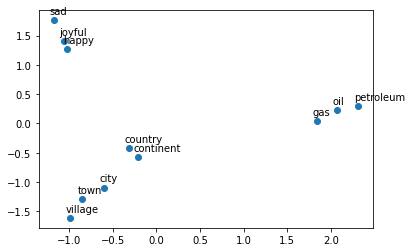

In [17]:
# visualisation en 2d
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

# <a name="2">II.Traduction de mot 

## <a name="mwe"> Matrices de Word embedding</a>

On pourrait prendre un mot en anglais et lui associé sa traduction en francais: 
    Si nous avons cat = [1,1] on parle **d'un word embedding** dans l'espace vectoriel des mots en anglais et que nous avons chat=[2,-2] dans l'espace vectoriel des mots en francais, comment faire le passage de [1,0,1] à [2,3,2]? 
   - On peut utiliser une matrice de transformation de vecteur que l'on nomme R 
   - On a $XR\approx Y$ ou X est une matrice représentant un sous ensemble du Vocabulaire dont les lignes représentent un **embedding**( vecteur associé à un mot) en Anglais et Francais pour Y 
   - les lignes de X et Y coincident mot en anglais dans X et son mot en francais dans Y 


In [18]:
import numpy as np                     
import matplotlib.pyplot as plt        

In [19]:
# fonction qui nous permettra de tracer nos vecteurs 
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)


dans notre exemple avec cat et chat on a:

$$R = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$$

Utilisons Numpy pour vérifier que $XR=Y$ on utilisera np.dot

In [20]:
R = np.array([[2, 0],
              [0, -2]])

In [21]:
x = np.array([[1, 1]]) 

In [22]:
y = np.dot(x, R) 
y

array([[ 2, -2]])

On a y 

Affichage de X

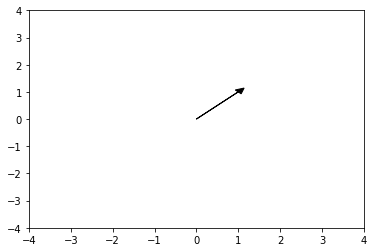

In [23]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

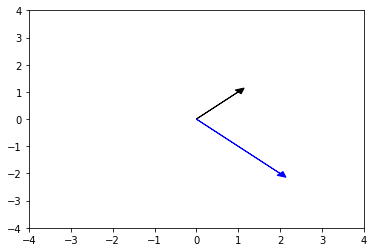

In [24]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

## <a name="adweaf"> Autour des données de word embedding anglais et français</a>
le but de cette partie est de rédiger un programme qui traduit l'anglais en français.




### <a name="cd2"> Chargement des données</a>

L'ensemble complet des données pour les vectorisations anglaises est d'environ 3,64 gigaoctets, et les données françaises
elle est d'environ 629 mégaoctets. On extrait un sous-ensemble des word embedding.

<a name="dicti"></a>
**Chargeons deux dictionnaires qui font correspondre les mots anglais et français**
* Un dictionnaire de train
* et un dictionnaire de test.

In [25]:
en_embeddings_subset = pickle.load(open("en_embeddings.p", "rb"))
fr_embeddings_subset = pickle.load(open("fr_embeddings.p", "rb"))

In [26]:
def get_dict(file_name):
    """
    Cette fonction renvoie le dictionnaire anglais-français dans un fichier où chaque colonne correspond à un mot.
    """
    my_file = pd.read_csv(file_name, delimiter=' ')
    etof = {}  # the english to french dictionary to be returned
    for i in range(len(my_file)):
        # indexing into the rows.
        en = my_file.loc[i][0]
        fr = my_file.loc[i][1]
        etof[en] = fr

    return etof

In [27]:
# chargement des dictionnaires anglais-français
en_fr_train = get_dict('en-fr.train.txt')
print('La longueur du dictionnaire de train anglais-français est de', len(en_fr_train))
en_fr_test = get_dict('en-fr.test.txt')
print('La longueur du dictionnaire de test anglais-français est de', len(en_fr_train))

La longueur du dictionnaire de train anglais-français est de 5000
La longueur du dictionnaire de test anglais-français est de 5000


En regardant le dictionnaire anglais-français

* `en_fr_train` est un dictionnaire où la clé est le mot anglais et la valeur
est la traduction française de ce mot anglais.
```
{"the" : "la",
 and" : "et",
 was' : 'était',
 for : "pour",
```

* `en_fr_test` est similaire à `en_fr_train`, mais c'est un ensemble de tests.  Nous ne le regarderons pas
jusqu'à ce qu'on arrive aux tests.

### <a name="gmwe"> Chargement des matrices de word embedding </a>



On va implémenter une fonction `get_matrices`, qui prend les données chargées
et renvoie les matrices `X` et `Y`.

Entrées :
- `en_fr` : Dictionnaire anglais-français
- `en_embeddings` : Dictionnaire anglais des embeddings
- `fr_embeddings` : Dictionnaire français des embeddings

Sorties :
- Matrice `X` et matrice `Y`, où chaque ligne de `X` est le  word embedding pour un
mot anglais, et la même ligne dans `Y` est le  word embedding pour la version française de ce mot anglais.

<div style="width:image width px ; font-size:100% ; text-align:center ;">
<img src='images/X_to_Y.jpg' alt="alternate text" width="width" height="height" style="width:800px;height:200px ;" /></div>

Utilisons le dictionnaire `en_fr` pour vous assurer que la ième ligne de la matrice `X`
correspond à la ième ligne de la matrice `Y`.


la fonction `get_matrices()` :

* Itére sur les mots anglais du dictionnaire `en_fr`.
* Vérifie si le mot a été vectorisé (embedding) à la fois en anglais et en français.

In [28]:
def get_matrices(en_fr, french_vecs, english_vecs) :
    """
    Entrée :
        en_fr : Dictionnaire anglais-français
        french_vecs : Les mots français à leurs word embedding correspondants.
        english_vecs : Mots anglais avec leurs word embedding correspondants.
    Sortie : 
        X : une matrice où les colonnes sont les word embedding anglais.
        Y : une matrice où les colonnes correspondent aux word embedding français .
        R : la matrice de projection qui minimise la norme F ||X R -Y||^2.
    """

    # X_l et Y_l sont des listes de word embedding anglais et français 
    X_l = list()
    Y_l = list()

    # récupérer les mots anglais (les clés dans le dictionnaire) et les stocker dans un ensemble()
    english_set = english_vecs.keys()

    # récupérer les mots français (clés dans le dictionnaire) et les stocker dans un ensemble()
    french_set = french_vecs.keys()

    # stocker les mots français qui font partie du dictionnaire anglais-français (ce sont les valeurs du dictionnaire)
    french_words = set(en_fr.values())

    # boucler toutes les paires de mots anglais, français dans le dictionnaire anglais-français
    for en_word, fr_word in en_fr.items():

        # vérifier que le mot français a une vectorisation (embedding) et que le mot anglais a une embedding
         if fr_word in french_set and en_word in english_set:
    

            # obtenir l'embedding en anglais
            en_vec = english_vecs [en_word]

            # obtenir l'embedding française
            fr_vec = french_vecs [fr_word]

            # ajouter l'embedding anglaise à la liste
            X_l.append(en_vec)

            # ajouter l'embedding française à la liste
            Y_l.append(fr_vec)

    # empiler les vecteurs de X_l dans une matrice X
    X = np.vstack(X_l)

    # empiler les vecteurs de Y_l dans une matrice Y
    Y = np.vstack(Y_l)
   

    return X, Y


Nous allons maintenant utiliser la fonction `get_matrices()` pour obtenir les ensembles `X_train` et `Y_train`.
des words embedding anglais et français dans les modèles spatiaux vectoriels correspondants.

In [29]:
X_train, Y_train = get_matrices(
    en_fr_train, fr_embeddings_subset, en_embeddings_subset)

### <a name="gmwetpd"> Générer la matrice de transformation avec la norme de Frobenius </a>



Tout d'abord la norme de Frobenius est la généralisation à $\mathbf{R}^2$ (espace des Réels au carré) de la fonction de norme déjà connue pour les vecteurs 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

Pour une matrice A donnée $\mathbf{R}^2$ , la norme de frobenius est définie comme suit :

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$


Exemple calculer $\|\mathrm{A}\|_{F}$ avec $A = \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix}$

In [30]:
A = np.array([[2, 2],
              [2, 2]])

In [31]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]], dtype=int32)

In [32]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

Dans les applications du monde réel, la perte de la norme de Frobenius :

$$\| \mathbf{XR} - \mathbf{Y}\|_{F}$$

est souvent remplacée par sa valeur au carré divisée par m:

$$ \frac{1}{m} \| \mathbf{X R} - \mathbf{Y} \|_{F}^{2}$$

où $m$ est le nombre d'exemples (lignes dans $\mathbf{X}$).

* Le même R est trouvé lorsque l'on utilise cette fonction de perte par rapport à la norme originale de Frobenius.
* La raison pour laquelle on prend le carré est qu'il est plus facile de calculer le gradient du carré de Frobenius.
* La raison de la division par $m$ est que nous sommes plus intéressés par la perte moyenne par intégration que par la perte pour l'ensemble de la formation.
    * La perte pour l'ensemble de la formation augmente avec le nombre de mots (exemples de formation),
    Ainsi, le fait de prendre la moyenne nous aide à suivre la perte moyenne, quelle que soit la taille de l'ensemble de formation.


**Comment trouver R ?**

On peut utiliser la norme de Foebenius 
- Initialiser R 
- faire jusqu'a convergence (Gradient Descent)
$$𝐿(𝑋,𝑌,𝑅)=Loss=\| XR - Y\|_{F}$$
$$g=\frac{d}{dR}𝐿(𝑋,𝑌,𝑅)=\frac{d}{dR}\Big(\frac{1}{m}\| X R -Y\|_{F}^{2}\Big) = \frac{2}{m}X^{T} (X R - Y)$$
$$R=R-\alpha g$$ 

Calculer la perte
* La fonction de perte sera le carré de la norme de Frobenoius de la différence entre
et son approximation, divisée par le nombre d'exemples de formation $m$.
* Sa formule est la suivante
$$ L(X, Y, R)=\frac{1}{m}\sum_{i=1}^{m} \sum_{j=1}^{n}\left( a_{i j} \right)^{2}$$

où $a_{i j}$ est la valeur dans la $i$ème ligne et la $j$ème colonne de la matrice $XR-Y$.

Fonction `compute_loss()` pour calculer  $L(X, Y, R)$.


In [33]:
def compute_loss(X, Y, R):
    '''
    Entrées : 
        X : une matrice de dimension (m,n) où les colonnes sont les words embedding anglais.
        Y : une matrice de dimension (m,n) où les colonnes correspondent aux words embedding français.
        R : une matrice de dimension (n,n) - matrice de transformation des words embedding anglais en words embedding français de l'espace vectoriel.
    Sortie :
        L : une matrice de dimension (m,n) - la valeur de la fonction de perte pour X, Y et R donnés.
    '''
   
    # m est le nombre de lignes de X
    m = X.shape[0]
    
    # diff est XR - Y
    diff = np.dot(X,R)-Y

    # diff_squared est le carré de la différence entre les éléments
    diff_squared = diff**2

    # sum_diff_squared est la somme des éléments au carré
    sum_diff_squared = np.sum(diff_squared)

    # perte: sum_diff_squared divisée par le nombre d'exemples (m)
    loss = sum_diff_squared/m
    return loss


* On va maintenant calculer le gradient g de la perte par rapport à la matrice de transformation `R`.
* Le gradient est une matrice qui modifie la valeur d'un petit changement dans `R`.
affectent la modification de la fonction de perte.
* Le gradient nous donne la direction dans laquelle nous devrions diminuer `R`.
pour minimiser la perte.
* $m$ est le nombre d'exemples de train (nombre de lignes en $X$).
* La formule pour le gradient de la fonction de perte $𝐿(𝑋,𝑌,𝑅)$ est :

$$g=\frac{d}{dR}𝐿(𝑋,𝑌,𝑅)=\frac{d}{dR}\Big(\frac{1}{m}\| X R -Y\|_{F}^{2}\Big) = \frac{2}{m}X^{T} (X R - Y)$$

On implémente la fonction `compute_gradient` ci-dessous.

In [34]:
def compute_gradient(X, Y, R):
    '''
    Entrées : 
        X : une matrice de dimension (m,n) où les colonnes sont les words embedding anglais.
        Y : une matrice de dimension (m,n) où les colonnes correspondent aux words embedding français.
        R : une matrice de dimension (n,n) - matrice de transformation des words embedding anglais en words embedding français de l'espace vectoriel.
    Sorties :
        g : une matrice de dimension (n,n) - gradient de la fonction de perte L pour X, Y et R donnés.
    '''
    
    # m nombre de ligne de X
    m = X.shape[0]

    # le gradient g est X^T(XR - Y) * 2/m
    gradient = np.dot(X.transpose(),np.dot(X,R)-Y)*(2/m)
    return gradient


On va implémenter la fonction `align_embeddings` pour la mise à jour par Gradient Descent $$R=R-\alpha g$$  ou $\alpha$ est le taux d'apprentissage

* Le taux d'apprentissage ou `taille de l'échelon` $\alpha$ est un coefficient qui décide combien nous voulons changer $R$ à chaque échelon.
* Si nous changeons trop $R$, nous pourrions sauter l'optimum en prenant un pas trop grand.
* Si nous ne changeons que légèrement $R$, nous aurons besoin de plusieurs étapes pour atteindre l'optimum.
* Le taux d'apprentissage $\alpha$ est utilisé pour contrôler ces changements.
* Les valeurs de $\alpha$ sont choisies en fonction du problème, et nous utiliserons `learning_rate`$=0.0003$ comme valeur par défaut pour notre algorithme.

In [35]:
def align_embeddings(X, Y, train_steps=100, learning_rate=0.0003):
    '''
    Entrées :
        X : une matrice de dimension (m,n) où les colonnes sont les words embedding anglais.
        Y : une matrice de dimension (m,n) où les colonnes correspondent aux words embedding français.
        train_steps : int positif - décrit le nombre de pas que fera l'algorithme de descente en gradient.
        learning_rate : positive float - décrit la taille des pas de l'algorithme de descente de gradient.
    Sorties :
        R : une matrice de dimension (n,n) - la matrice de projection qui minimise la norme F ||X R -Y||^2
    '''
    np.random.seed(129)

    # le nombre de colonnes de X est le nombre de dimensions pour un vecteur de mots (par exemple 300)
    # R est une matrice carrée dont la longueur est égale au nombre de dimensions de le word enbedding
    R = np.random.rand(X.shape[1], X.shape[1])

    for i in range(train_steps):
        if i % 25 == 0:
            print(f"loss at iteration {i} is: {compute_loss(X, Y, R):.4f}")
       
        # utilise la fonction définie pour calculer le gradient
        gradient = compute_gradient(X,Y,R)

        # mettre à jour R en soustrayant le taux d'apprentissage fois le gradient
        R -= learning_rate * gradient

    return R


Test

In [36]:
np.random.seed(129)
m = 10
n = 5
X = np.random.rand(m, n)
Y = np.random.rand(m, n) * .1
R = align_embeddings(X, Y)

loss at iteration 0 is: 3.7242
loss at iteration 25 is: 3.6283
loss at iteration 50 is: 3.5350
loss at iteration 75 is: 3.4442


calcul de R sur nos données

In [37]:
R_train = align_embeddings(X_train, Y_train, train_steps=400, learning_rate=0.8)

loss at iteration 0 is: 963.0146
loss at iteration 25 is: 97.8292
loss at iteration 50 is: 26.8329
loss at iteration 75 is: 9.7893
loss at iteration 100 is: 4.3776
loss at iteration 125 is: 2.3281
loss at iteration 150 is: 1.4480
loss at iteration 175 is: 1.0338
loss at iteration 200 is: 0.8251
loss at iteration 225 is: 0.7145
loss at iteration 250 is: 0.6534
loss at iteration 275 is: 0.6185
loss at iteration 300 is: 0.5981
loss at iteration 325 is: 0.5858
loss at iteration 350 is: 0.5782
loss at iteration 375 is: 0.5735


In [38]:
R_train

array([[-0.01362498, -0.01376288, -0.00382809, ...,  0.00297988,
        -0.00585451, -0.00035307],
       [ 0.02115732, -0.00386311,  0.00583104, ...,  0.02312933,
        -0.00235515,  0.00306189],
       [ 0.00820657,  0.00297308,  0.01993382, ..., -0.00215262,
        -0.00264195,  0.00812032],
       ...,
       [-0.00135703,  0.00797791, -0.01720783, ..., -0.00984865,
         0.00672823,  0.00275493],
       [ 0.00619364, -0.00598647,  0.0027768 , ..., -0.00575446,
         0.00292054,  0.00327975],
       [ 0.0053762 , -0.01577644, -0.00707282, ..., -0.01446361,
         0.00845145, -0.00706754]])

On pourrait aussi utiliser les [K-plus proches](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins) pour trouver un mot francais correspondant mais il n'y a pas de garantie comme celle de trouver ces amis les plus proce dans un meme pays mais si ce n'est pas dans un continent on a plus de chance. Alors pourquoi ne pas placer chacun de nos amis dans des sceaux? parlons des Hash Tables (Regrouper dans des sceaux par similitude) et fonction de Hashage.

### <a name="kt"> KNN et tests </a>

Comme nous approchons la fonction de traduction des embeddings de l'anglais au français par une matrice de transformation linéaire $R$, la plupart du temps nous n'obtiendrons pas l'embedding exacte d'un mot français lorsque nous transformons l'embedding $\mathbf{e}$ d'un mot anglais particulier dans l'espace d'embeddings français. 
* C'est là que $k$-NN devient vraiment utile ! En utilisant $1$-NN avec $eR$ comme entrée, nous pouvons rechercher une embeddings $\mathbf{f}$ (en ligne) dans la matrice $\mathbf{Y}$ qui est la plus proche du vecteur transformé $eR$.

Entrées :
* Vecteur `v`,
* Un ensemble de voisins les plus proches possibles `candidats`.
* `k` les plus proches voisins à trouver.
* La métrique de la distance doit être basée sur la similarité du cosinus.
* La fonction de similarité cosinus est déjà implémentée et importée pour vous. Ses arguments sont deux vecteurs et elle renvoie le cosinus de l'angle entre eux.
* On itère les lignes dans les `candidats`, et on sauvegarde le résultat des similarités entre la ligne courante et le vecteur `v` dans une liste python. On doit faire attention à ce que les similarités soient dans le même ordre que les vecteurs de lignes des `candidats`.
* On peut maintenant utiliser [numpy argsort]( https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html#numpy.argsort) pour trier les indices des lignes de `candidats`.

Implémentons la fonction `nearest_neighbor`

In [39]:
def nearest_neighbor(v, candidates, k=1) :
    """
    Entrée :
      - v, le vecteur pour lequel vous allez trouver le plus proche voisin
      - les candidats : un ensemble de vecteurs où l'on trouvera les voisins
      - k : top k des voisins les plus proches à trouver
    Sortie :
      - k_idx : les indices des k vecteurs les plus proches sous forme triée
    """

    similarity_l = []

    # pour chaque vecteur candidat...
    for row in candidates:
        # obtenir la similarité du cosinus
        cos_similarity = cosine_similarity(v,row)

        # ajouter la similarité à la liste
        similarity_l.append(cos_similarity)
        
    # trier la liste de similitudes et obtenir les indices de la liste triée
    sorted_ids = np.argsort(similarity_l)

    # obtenir les indices des k vecteurs candidats les plus similaires
    k_idx = sorted_ids[-k:]
    
    return k_idx

voici les 3 plus proches 

In [40]:

v = np.array([1, 0, 1])
candidates = np.array([[1, 0, 5], [-2, 5, 3], [2, 0, 1], [6, -9, 5], [9, 9, 9]])
print(candidates[nearest_neighbor(v, candidates, 3)])

[[9 9 9]
 [1 0 5]
 [2 0 1]]


Implémentons maintenant la fonction `test_vocabulary` qui prend en compte la matrice des words embeddings anglais $X$, la matrice des words embeddings français $Y$ et le $R$ et renvoie la précision des traductions de $X$ à $Y$ par $R$.

* Itérer les words embeddings anglais transformés et vérifié si le
words embeddings français le plus proche appartient au mot français qui est la traduction réelle.
* Obtenir un index de l'incrustation française la plus proche en utilisant
`nearest_neighbor` (avec l'argument `k=1`), et le comparer à l'index
du word embedding anglais que vous venez de transformer.
* Notez le nombre de fois que vous obtenez la bonne traduction.
* Calculer la précision comme suit : $$\text{accuracy}=\frac{\#(\text{correct predictions})}{\#(\text{total predictions})}$$

In [41]:
# UNQ_C10 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_vocabulary(X, Y, R):
    '''
    Entrée :
        X : une matrice où les colonnes sont les words embedding anglais.
        Y : une matrice où les colonnes correspondent aux words embedding français.
        R : la matrice de transformation qui traduit les words embedding de l'espace vectoriel de mots anglais-français.
    Sortie :
        accuracy (précision) : pour les capitales de l'anglais vers le français
    '''
    # La prédiction est X fois R
    pred = np.dot(X,R)

    # initialiser le num_correct à zéro
    num_correct = 0

    # boucle à travers chaque ligne dans le pred (chaque embedding transformé)
    for i in range(len(pred)):
        # obtenir l'indice du plus proche voisin de pred à la ligne "i" ; passer également les candidats à Y
        pred_idx = nearest_neighbor(pred[i],Y)

       # si l'indice du plus proche voisin est égal à la ligne de i... \
        if pred_idx == i:
            # incrémenter le nombre correct de 1.
            num_correct += 1

    # La précision est le nombre correct divisé par le nombre de lignes dans "pred" (également le nombre de lignes dans X)
    accuracy = num_correct / len(pred)

    return accuracy


Voyons comment fonctionne notre mécanisme de traduction sur les données non visibles :

In [42]:
X_val, Y_val = get_matrices(en_fr_test, fr_embeddings_subset, en_embeddings_subset)

In [43]:
acc = test_vocabulary(X_val, Y_val, R_train)  # cela pourrait prendre une minute ou deux
print(f"La précision de l'ensemble de tests est {acc:.3f}")

La précision de l'ensemble de tests est 0.557


# <a name="3">III.Matrice et Vecteur de documents (tweets)</a>


## <a name="vd">Vecteur de document</a>

On peut représenter un document( ici il s'agira d'un ensemble de `tweet`) comme un vecteur en additionnant les vecteurs de mots pour les mots à l'intérieur du document. Dans cet exemple, notre **"word embedding"** ( le mot et son vecteur si on se réfère à la partie précédente) ne contient que trois mots, chacun étant représenté par un tableau 3D.

<img src="images/doc.png" style="width:700px;height:400;">

Voici le code nous permettant de représenter l'embedding de I love learng!

In [44]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)
    
print(document_embedding)

[1 0 3]


## <a name="idt"> Importation des données de tweets</a>

On utilise la base de donnée **twitter_samples** qui contient des tweets en anglais ayant des sentiments positifs et négatifs.

In [45]:
from nltk.corpus import twitter_samples

In [46]:
# récupérer les tweets positifs and negatifs 
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = all_positive_tweets + all_negative_tweets

## <a name="cmddt"> Construction de la matrice de document avec les données de tweets</a>

Nous allons implémenter plusieurs fonction pour pouvoir représenter l'ensemble des vecteurs de chaque teweet en une matrice.

Fonction ` process_tweet()`qui renvoie un tweet tokénisé (vecteur qui contients les mots "importants" du tweet)

In [47]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer



def process_tweet(tweet):
    """Fonction  process_tweet.
    Entrée :
        tweet : une chaîne de caractères contenant un tweet
    Sortie :
        tweets_clean : une liste de mots contenant le tweet traité

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # supprimer les tickers etc comme $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # supprimer l'ancien texte retweet "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # supprimer les hyperliens
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # supprimer les hashtags
    # en retirant seulement le signe dièse # du mot
    tweet = re.sub(r'#', '', tweet)
    # tokenizer les tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # supprimer les stopwords
                word not in string.punctuation):  # supprimer les ponctuations
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # racine du mot
            tweets_clean.append(stem_word)

    return tweets_clean


Fonction `get_document_embedding` qui calcule la somme des Word embediing de tweet pour obtenir l'embedding des documents. On utilisera les words enbedding de la [partie précédente](#dicti)

In [48]:
def get_document_embedding(tweet, en_embeddings): 
    '''
    Entrée :
        - tweet : une chaîne de caractere
        - en_embeddings : un dictionnaire de word embedding (mot,vecteur)
    Sortie :
        - doc_embedding : somme de tout les word embedding pour les mots du tweet tokénisé
    '''
    doc_embedding = np.zeros(300)

    # transformer le document (tweet) en une liste de mots (traiter le tweet)
    processed_doc = process_tweet(tweet)
    for word in processed_doc:
        # ajouter le word embeding au total courant pour l'embedding (la vectorisation) du document
        doc_embedding += en_embeddings.get(word,0)
 
    return doc_embedding


In [49]:
# test de notre fonction avec un tweet on affiche les 5 derniers
custom_tweet = "RT @Twitter @chapagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np"
tweet_embedding = get_document_embedding(custom_tweet, en_embeddings_subset)
tweet_embedding[-5:]

array([-0.00268555, -0.15378189, -0.55761719, -0.07216644, -0.32263184])

Tweet tokénisé:

In [50]:
process_tweet(custom_tweet)

['hello', 'great', 'day', ':)', 'good', 'morn']

Fonction `get_document_vecs` pour avoir l'embedding de chaque tweet de nos données **twitter_samples**

In [51]:
def get_document_vecs(all_docs, en_embeddings):
    '''
    Entrée :
        - all_docs : liste des chaînes de caractères de tous les tweets de notre base de données.
        - en_embeddings : dictionnaire dont les mots sont les clés et les valeurs sont leurs embeddings.
    Sortie :
        - document_vec_matrix : matrice des word embedding de document (tweet).
        - ind2Doc_dict : dictionnaire avec les indices des tweets en vecteurs comme clés et leurs valeurs.
    '''

    # la clé du dictionnaire est un index (entier) qui identifie un tweet spécifique
    # la valeur est l'encastrement du document pour ce document
    ind2Doc_dict = {}

    # c'est la liste qui permettra de stocker les vecteurs de documents
    document_vec_l = []

    for i, doc in enumerate(all_docs):

        # obtenir l'embedding du document dans le tweet
        doc_embedding = get_document_embedding(doc,en_embeddings)

        # enregistrer l'embedding du document dans le dictionnaire ind2Tweet à l'index i
        ind2Doc_dict[i] = doc_embedding

        # ajouter l'embedding du document dans la liste des vecteurs de document
        document_vec_l.append(doc_embedding)


    # convertir la liste des vecteurs de documents en un tableau 2D (chaque ligne est un vecteur de document)
    document_vec_matrix = np.vstack(document_vec_l)

    return document_vec_matrix, ind2Doc_dict


In [52]:
document_vecs, ind2Tweet = get_document_vecs(all_tweets, en_embeddings_subset)

In [53]:
print(f"longueur du dictionnaire {len(ind2Tweet)}")
print(f"taille de document_vecs  {document_vecs.shape}")

longueur du dictionnaire 10000
taille de document_vecs  (10000, 300)


In [54]:
document_vecs[0,:5]

array([ 0.04821777, -0.01904297,  0.15820312, -0.18847656, -0.11352539])

## <a name="ttsasc"> Trouver les tweets similaires avec la similarité cosinus</a>


Nous avons maintenant un vecteur de dimension (m,d) où "m" est le nombre de tweets (10 000) et "d" est la dimension des embeddings (300).  Nous allons maintenant entrer un tweet, et utiliser la similarité cosinus pour voir quel tweet dans notre corpus lui est similaire.

In [55]:
my_tweet = 'i am sad'
process_tweet(my_tweet)
tweet_embedding = get_document_embedding(my_tweet, en_embeddings_subset)

In [56]:
# cela nous donne un tweet similaire à votre contribution.
# cette implémentation est vectorisée...
idx = np.argmax(cosine_similarity(document_vecs, tweet_embedding))
print(all_tweets[idx])

@zoeeylim sad sad sad kid :( it's ok I help you watch the match HAHAHAHAHA


# <a name="4">IV. [Hachage sensible à la localité (HSL)](https://fr.qaz.wiki/wiki/Locality-sensitive_hashing)</a>

## <a name="fh">Fonction de Hashage </a>

Ici nos "amis" sont les vecteur de mot (word embedding)

La fonction de hashage: c'est la fonction qui va nous permettre de regrouper nos vecteurs dans des sceaux.

Soit 10 sceaux numérotées de 0 à 9 



Soit 10 sceaux numérotées de 0 à 9 

on associe 100 et 10 au sceaux 0 
On associe 14 au sceau 4
On associe 17 au sceau 7
On associe 97 au sceau 7



ici l'opérattion de hachage est définit par  Fonction_hachage(Value)= Hash Value avec Hash_Value = Value %  n_buckets(nombre de sceau)  avec % qui signifie modulo, le reste de la division euclidienne de vector par le nombre de sceau qui est de 10, exempe  en effet 14%10 =4 car 10*1+4

In [57]:
import pprint                     
pp = pprint.PrettyPrinter(indent=4) # jolie couleur

Implémentons cette exemple avec la fonction `basic_hash_table().`

In [58]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # Initialiser tous les seaux dans la table de hachage comme des listes vides

    for value in value_l:
        hash_value = hash_function(value,n_buckets) # Obtenir la clé de hachage pour la valeur donnée
        hash_table[hash_value].append(value) # Ajouter l'élément au seau correspondant
    
    return hash_table

In [59]:
value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


## <a name="fhm">Fonction de Hachage multiplan </a>

Les fonctions de hachage multiplans sont d'autres types de fonctions de hachage. Les fonctions de hachage multiplans sont basées sur l'idée de numéroter chaque région formée par l'intersection de n plans ont les considères alors comme nos sceaux à remplir. Dans le code suivant, nous montrons les formes les plus fondamentales du principe des multiplans. Tout d'abord, avec un seul plan définit par le vecteur normal P= [1,1]

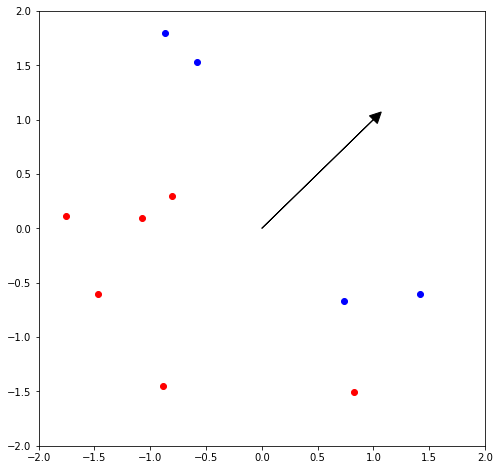

In [60]:
P = np.array([[1, 1]]) # Définir un plan unique. 
fig, ax1 = plt.subplots(figsize=(8, 8)) #la taille de la figure 

plot_vectors([P], axes=[2, 2], ax=ax1) # Tracez le plan P comme un vecteur

# Tracer des points au hasard. 
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Obtenez une paire de nombres aléatoires entre -4 et 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
       # Colorer les points en fonction du signe du résultat de np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # point bleu
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # point rouge

plt.show()


La première chose à noter est que le vecteur qui définit le plan ne marque pas la limite entre les deux côtés du plan. Il marque la direction dans laquelle vous trouvez le côté "positif" du plan. Ce n'est pas du tout intuitif !

Si nous voulons tracer le plan de séparation, nous devons tracer une ligne qui est perpendiculaire à notre vecteur `P`. Nous pouvons obtenir une telle ligne en utilisant une matrice de rotation de $90^o$. Avant celà voyons un peu les hyperplans et les matrices de rotation.


### <a name="lhdev">Les hyperplans dans les espaces vectoriels</a>

* Dans un espace vectoriel à $3$, l'hyperplan est un plan régulier. Dans un espace vectoriel à $2$  dimension, l'hyperplan est une ligne.
* En général, l'hyperplan est un sous-espace qui a une dimension inférieure de $1$ à celle de l'espace vectoriel d'origine.
* Un hyperplan est uniquement défini par son vecteur normal.
* Le vecteur normal $n$ du plan $\pi$ est le vecteur auquel tous les vecteurs du plan $\pi$ sont orthogonaux (perpendiculaire dans le cas dimensionnel $3$).




### <a name="uhdev">Utilisation des hyperplans pour diviser l'espace vectoriel</a>

Nous pouvons utiliser un hyperplan pour diviser l'espace vectoriel en  $2$ parties:
* Tous les vecteurs dont le produit des points avec le vecteur normal d'un plan est positif se trouvent sur un côté du plan.
* Tous les vecteurs dont le produit des points avec le vecteur normal du plan est négatif se trouvent de l'autre côté du plan.

Les `matrices de rotation` dans $R^2$ font pivoter un vecteur donné $\vec x$ d'un angle dans le sens anti-horaire $\theta$ dans un système de coordonnées fixe. Les matrices de rotation sont de la forme :

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\\\\ sin \theta & cos \theta \end{bmatrix}$$


Maintenant, traçons dans le même système notre vecteur $\vec x = [1, 1]$ (il s'agit de P) et son produit matriciel avec la matrice
$Ro$ pour un angle de 45°

Vecteur rotatif

$$y = x \cdot Ro $$

In [61]:
angle = 45 * (np.pi / 180) #convertir 45° en radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([1, 1]).reshape(1, -1) # le transformer en vecteur ligne
y2 = np.dot(x2, Ro)

print('Matrice de Rotation')
print(Ro)
print('\nVecteur rotatif')
print(y2)

print('\n nome x2', np.linalg.norm(x2))
print('\n norme y2', np.linalg.norm(y2))
print('\n norme de la matrice de Roation', np.linalg.norm(Ro))

Matrice de Rotation
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Vecteur rotatif
[[1.41421356 0.        ]]

 nome x2 1.4142135623730951

 norme y2 1.4142135623730951

 norme de la matrice de Roation 1.4142135623730951


* La norme du vecteur d'entrée est la même que la norme du vecteur de sortie. Les matrices de rotation ne modifient pas la norme du vecteur, mais seulement sa direction.
* La norme de toute matrice de rotation de $R^2$ est toujours $\sqrt 2 = 1.414221$.

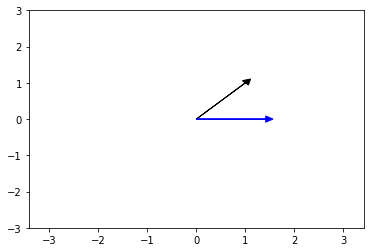

In [62]:
plot_vectors([x2, y2], fname='transform_02.svg')

Deux vecteurs formant un angle de 45°

Dans notre cas nous voulons un angle de 90° pour tracer la ligne(l'hyperplan) qui sépare nos deux plans

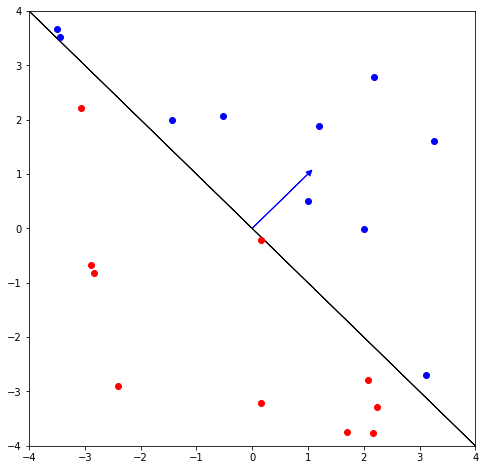

In [63]:
P = np.array([[1, 1]])  

# Obtenir un nouveau plan perpendiculaire à P. Nous utilisons une matrice de rotation
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) #la taille de la figure

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Tracez le plan P comme un vecteur

# Tracez le plan P comme 2 vecteurs. 
# On met à l'échelle par 2 juste pour que les flèches sortent de la boîte
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot 20 random points. 
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Obtenez une paire de nombres aléatoires entre -4 et 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Obtenir le signe du produit scalaire avec P
        # Colorer les points en fonction du signe du résultat de np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') #  un point bleu
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # un point rouge

plt.show()


Maintenant si on choisis 3 points $v_1=[1,2],v_2=[-1,1]$ et $v_3=[-2,-1]$, comment savoir de quel coté du plan se trouve chaque point ? 

<img src="images/lsh1.png" style="width:700px;height:400;">



Pour celà nous devons faire le produit scalaire de P et de chaque point on a : 
- $Pv_1^{T}=3$
- $Pv_2^{T}=0$
- $Pv_3^{T}=-3$

In [64]:
P = np.array([[1, 1]])      # plan unique
v1 = np.array([[1, 2]])     
v2 = np.array([[-1, 1]])    
v3 = np.array([[-2, -1]])   


In [65]:
np.dot(P, v1.T)

array([[3]])

In [66]:
np.dot(P, v2.T)

array([[0]])

In [67]:
np.dot(P, v3.T)

array([[-3]])

Comme on l'a vu précédement avec l'Hyperplan:

- Si le signe du produit scalaire entre P et un point v est positif alors ce point se trouve dans le plan de droite (points bleus ), la valeur de hashage vaudra 1, **1 car il se trouve du meme coté que le vecteur normal P.**
- Si le signe du produit scalaire entre P et un point v est positif et négatif alors ce point se trouve sur la droite perpendiculaie au vecteur P,  la valeur de hashage vaudra 0, **il se trouve sur l'hyperplan.**
- Si le signe du produit scalaire entre P et un point v est négatif alors ce point se trouve dans le plan de gauche (points rouges ), la valeur de hashage vaudra -1, **-1 car il se trouve du coté opposé au vecteur normal P.**

<a name='slide'></a>
La fonction `side_of_plane()` ci-dessous vérifie de quel côté du plan P se trouve le vecteur `v`.

In [68]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix 
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [69]:
side_of_plane(P, v1) # Dans quel coté se trouve [1, 2] ?

1

In [70]:
side_of_plane(P, v2) # et [-1, 1]

0

In [71]:
side_of_plane(P, v3) # et [-2, -1]

-1

## <a name="vhpp">Valeur de hachage avec plusieurs plans</a>

Lorsque l'on a plusieurs plan comment trouver le coté d'un point v pour chacun des plans $P_1, P_2$ et $P_3$? 

<img src="images/multip.png" style="width:700px;height:400;">


On considère 3 plans définit par $P_1=[1,1], P_2=[-1,1]$ et $P_3=[-1,-1]$ et le vecteur $v=[2,2]$.

On souhaiterais avoir une seul valeur de hachage pour les combiner

Pour chaque plan $P_i$ et le vecteur $v$ 

on définit $sign_i$ tel que :
- $sign_i=sign(P_iv^{T}) $

et $h_i$ tel que : 
- $sign_i \geq 0 \Rightarrow h_i=1$
- $sign_i < 0 \Rightarrow h_i=0$

On définit alors la valeur de hachage sensible à la localité par : 
$$ hash = \sum_{i=0}^{N-1} \left( 2^{i} \times h_{i} \right) $$ avec N le nombre de plans

Dans notre cas: 
 
- $P_1v^t=3, sign_1=+1, h_1=1$
- $P_2v^t=5, sign_2=+1, h_2=1$
- $P_3v^t=-2, sign_3=-1, h_3=0$
- $hash = 2^0h_1+2^1h_2+2^2h_3$= 1x1+2x1+4x0=3



Implémentons celà avec la fonction suivante crée une valeur de hachage basée sur un ensemble de plans. **La valeur de sortie est une combinaison du côté du plan où le vecteur est localisé par rapport à l'ensemble des plans.**

In [72]:
P1 = np.array([[1, 1]])   # Premier plan
P2 = np.array([[-1, 1]])  
P3 = np.array([[-1, -1]]) 
P_l = [P1, P2, P3]  # Liste de vecteur. c'est le multiplan

# Vecteur à rechercher
v = np.array([[2, 2]])

In [73]:
P_l

[array([[1, 1]]), array([[-1,  1]]), array([[-1, -1]])]

<a name='hsmp'></a>
La fonction `hash_multi_plane()`suivante crée une valeur de hachage basée sur un ensemble de plans. La valeur de sortie est une combinaison du côté du plan où le vecteur est localisé par rapport à l'ensemble des plans.

Nous pouvons considérer cette liste de plans comme un ensemble de fonctions de hachage de base, chacune d'entre elles ne pouvant produire que 1 ou 0 en sortie.

In [74]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l): # i:P , 0:[[1 1]], 1:[[-1  1]],2:[[-1 -1]]
        sign = side_of_plane(P,v)  # on utilise notre fonction précédente
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [75]:
hash_multi_plane(P_l, v) # Trouvez le numéro du plan qui contient cette valeur

3

## <a name="pa">Plans aléatoires</a>


Dans la cellule ci-dessous, nous créons un ensemble de trois plans aléatoires

In [76]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(  # loi normal 
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


On choisit un vecteur v=[2,2]

In [77]:
v = np.array([[2, 2]])

La fonction suivante est similaire à la fonction [`side_of_plane()`](#slide), mais elle évalue plus qu'un plan à chaque fois. Le résultat est un tableau avec le côté du plan de `v`, pour l'ensemble des plans `P`.

In [78]:
# Side of the plane function. The result is a matrix
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Get a boolean value telling if the value in the cell is positive or negative
    return sign_of_dot_product

Obtenir le côté du plan du vecteur `[2, 2]` pour l'ensemble des plans aléatoires. 

In [79]:
sides_l = side_of_plane_matrix(
            random_planes_matrix, v)
sides_l

array([[1.],
       [1.],
       [1.]])

coté 1 de chaque plan 

Maintenant, utilisons la première fonction  [`hash_multi_plane()`](#hsmp) pour définir notre fonction `hash_multi_plane_matrix()` de hachage multiplan

In [80]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Obtenir le côté des plans pour P et v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Obtenir la valeur à l'intérieur de la cellule de la matrice
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i # somme de 2^i * hash_i
        
    return hash_value

Affichage du seau de hachage pour le vecteur `v = [2, 2]`. 

In [81]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7


Cela vous a montré comment faire une série de plan  au hasard.  Nous ferons plusieurs séries d'avions aléatoires afin de rendre les voisins les plus proches plus précis.

## <a name="ttpsh">Trouver les tweets les plus similaires avec le HSL</a>

On va maintenant mettre en œuvre le hachage sensible à la localité (HSL) pour identifier le [tweet](#idt) le plus similaire.
* Au lieu de regarder les 10 000 vecteurs, nous pouvons simplement rechercher un sous-ensemble pour trouver
ses voisins les plus proches.

Disons que vos points de données sont tracés comme ceci :


<div style="width:image width px ; font-size:100% ; text-align:center ;"><img src='images/one.png' alt="alternate text" width="width" height="height" style="width:400px;height:200px ;" /> </div>

Nous pouvons diviser l'espace vectoriel en régions et rechercher dans une région les voisins les plus proches d'un vecteur donné.

<div style="width:image width px ; font-size:100% ; text-align:center ;"><img src='images/four.png' alt="alternate text" width="width" height="height" style="width:400px;height:200px ;" /> </div>

In [82]:
N_VECS = len(all_tweets)       
N_DIMS = len(ind2Tweet[1])  
print(f"Le nombre de vecteurs est de {N_VECS} et chacun a une dimensions de {N_DIMS} .")

Le nombre de vecteurs est de 10000 et chacun a une dimensions de 300 .


### <a name="cnp">Choisir le nombre de plans</a>

* Chaque plan divise l'espace en 2 seaux .
* Donc les $n$ plans  divisent l'espace en seaux de hachage à $2^{n} parties$.
* Nous voulons organiser 10 000 vecteurs de documents (tweets) dans des seaux, de sorte que chaque seaux contiennent environ 16 vecteurs.
* Pour cela, nous avons besoin de $\frac{10000}{16}=625$ seaux.
* Nous sommes intéressés par $n$, nombre de plans, donc $2^{n}=625$. Maintenant, nous pouvons calculer $n=\log_{2}625 = 9,29 \approx 10$.

In [83]:
# Le nombre de plans. Nous utilisons log2(625) pour avoir ~16 vecteurs/seau.
N_PLANES = 10
# Nombre de fois où il faut répéter le hachage pour améliorer la recherche.
N_UNIVERSES = 25

### <a name="ovhv">Obtenir la valeur de hachage d'un vecteur</a>

Pour chaque vecteur, nous devons obtenir un numéro unique associé à ce vecteur afin de l'attribuer à un "seau de hachage".

 On va créer des séries de plans aléatoires:`planes_l` 
* Créons  plusieurs ensembles(25) de plans (les plans qui divisent la région).
* Nous pouvons considérer qu'il y a 25 façons différentes de diviser l'espace vectoriel avec un ensemble de plans différent.
* Chaque élément de cette liste contient une matrice de 300 lignes ( dimensions de 300 ) et 10 colonnes (il y a 10 plans dans chaque "univers")

In [84]:
np.random.seed(0)
planes_l = [np.random.normal(size=(N_DIMS, N_PLANES))
            for _ in range(N_UNIVERSES)]

On va implémenter la fonction `hash_value_of_vector` qui contrairement à [`hash_multi_plane()`](#hsmp) définit h comme un vecteur remplit de 0 ou 1 et qui place le vecteur `v` dans le bon seau de hachage .

* On multipliera d'abord notre vecteur `v`, par un plan correspondant. Cela vous donnera un vecteur de dimension $(1,\text{N_plans})$.
* On convertira ensuite chaque élément de ce vecteur en 0 ou 1.
* Puis nous créerons un vecteur de hachage h en faisant ce qui suit : si l'élément $h[i]$ est négatif, il devient un 0, sinon nous le changeons en un 1.
* On calcule ensuite le nombre unique (valeur de hachage) pour le vecteur par itération sur `N_PLANES`.
* Ensuite, on multiolie $2^i$ par le $h[i]$ correspondant (0 ou 1).
* On va  ensuite stocker cette somme dans la variable `hash_value`.

.
On utilisera cette formule :

$$ hash = \sum_{i=0}^{N-1} \left( 2^{i} \times h_{i} \right) $$

In [85]:
def hash_value_of_vector(v, planes):
    """Créer un hash pour un vecteur ; hash_id indique quel hash aléatoire utiliser.
    Entrée :
        - v : vecteur de tweet. Sa dimension est (1, N_DIMS)
        - planes : matrice de dimension (N_DIMS, N_PLANES) - l'ensemble des plans qui divisent la région
    Sortie :
        - hash_value : un numéro qui est utilisé comme hachage pour votre vecteur

    """
   
    # pour la série de plans,
    # calculer le produit du point entre le vecteur et la matrice contenant les plans
    # se rappeler que les plans ont une taille (300, 10)
    # Le produit scalaire aura une taille (1,10)
    dot_product = np.dot(v,planes)

    # obtenir le signe du produit scalaire
    sign_of_dot_product = np.sign(dot_product)

    # mettre h à faux (équivalent à 0 lorsqu'il est utilisé dans les opérations) si le signe est négatif,
    # et vrai (équivalent à 1) si le signe est positif 
    h = sign_of_dot_product>=0

    # supprimer les dimensions inutilisées supplémentaires (convertir ce tableau de 2D en tableau de 1D)
    h = np.squeeze(h)

   # initialiser la valeur de hachage à 0
    hash_value = 0

    n_planes = planes.shape[1]
    for i in range(n_planes):
        # augmenter la valeur de hachage de 2^i * h_i
        hash_value += np.power(2,i)*h[i]

    # utiliser hash_value comme un entier
    hash_value = int(hash_value)

    return hash_value


In [86]:

np.random.seed(0)
idx = 0
planes = planes_l[idx]  # obtenir un "univers" de plan pour tester la fonction
vec = np.random.rand(1, 300)
print(f" La valeur de hachage pour ce vecteur,",
      f"et l'ensemble des plans à l'index {idx},",
      f"est {hash_value_of_vector(vec, planes)}")

 La valeur de hachage pour ce vecteur, et l'ensemble des plans à l'index 0, est 768


### <a name="cth">Création d'une table de hachage</a>

Étant donné que nous avons un numéro unique pour chaque vecteur (ou tweet), nous voulons maintenant créer une table de hachage. Nous avons besoin d'une table de hachage, de sorte que, étant donné un hash_id, nous puissions rapidement rechercher les vecteurs correspondants. Cela nous permet de réduire considérablement le temps de recherche.

<div style="width:image width px ; font-size:100% ; text-align:center ;"><img src='images/table.png' alt="alternate text" width="width" height="height" style="width:500px;height:200px ;" /> </div>

Nous avons la fonction `make_hash_table`, qui fait correspondre les vecteurs de tweet à un seau et y stocke le vecteur. Elle renvoie la `hash_table` et la `id_table`. L'"id_table" nous permet de savoir quel vecteur dans une certaine zone correspond à quel tweet.

In [87]:
def make_hash_table(vecs, planes):
    """
    Entrée :
        - vecs : liste des vecteurs à hacher.
        - planes : la matrice des plans d'un "univers" unique, avec la forme (dimensions d'embeddings, nombre de plans).
    Sortie :
        - hash_table : dictionnaire - les clés sont des hachages, les valeurs sont des listes de vecteurs (seau de hachage)
        - id_table : dictionnaire - les clés sont des hachages, les valeurs sont des listes de vecteurs id
                            (il permet de savoir quel tweet correspond au vecteur haché)
    """

    # le nombre de plans est le nombre de colonnes dans la matrice des plans
    num_of_planes = planes.shape[1]

    # le nombre de seaux est de 2^(nombre d'avions)
    num_buckets = 2**num_of_planes

    # créer la table de hachage comme un dictionnaire.
    # Les clés sont des entiers (0,1,2.. nombre de seaux)
    # Les valeurs sont des listes vides
    hash_table = {i :[] for i in range(num_buckets)}

    # créer la table d'identification comme un dictionnaire.
    # Les clés sont des entiers (0,1,2... nombre de seaux)
    # Les valeurs sont des listes vides
    id_table = {i:[] for i in range(num_buckets)}

    # pour chaque vecteur dans les "vecs".
    for i, v in enumerate(vecs):
        # calculer la valeur de hachage pour le vecteur
        h = hash_value_of_vector(v,planes)

        # stocker le vecteur dans hash_table à la clé h,
        # en ajoutant le vecteur v à la liste à la touche h
        hash_table[h].append(v)

        # stocker l'index 'i' du vecteur (chaque document reçoit un entier unique 0,1,2...)
        # la clé est le h, et le 'i' est ajouté à la liste à la clé h
        id_table[h].append(i)

    return hash_table, id_table


In [88]:
np.random.seed(0)
planes = planes_l[0]  # obtenir un "univers" de plans pour tester la fonction
vec = np.random.rand(1, 300)
tmp_hash_table, tmp_id_table = make_hash_table(document_vecs, planes)

print(f"La table de hachage à la clé 0 a {len(tmp_hash_table[0])} vecteurs de documents")
print(f"La table d'identification à la clé 0 a {len(tmp_id_table[0])}")
print(f"Les 5 premiers index de documents stockés à la clé 0  sont {tmp_id_table[0][0:5]}")

La table de hachage à la clé 0 a 3 vecteurs de documents
La table d'identification à la clé 0 a 3
Les 5 premiers index de documents stockés à la clé 0  sont [3276, 3281, 3282]


### <a name="ctth">Création de toutes les tables de hachage</a>

Nous pouvons maintenant hacher nos vecteurs et les stocker dans une table de hachage qui
nous permettrait de rechercher rapidement des vecteurs similaires.
Lançons la cellule ci-dessous pour créer les hachages. En faisant cela, nous finissons par avoir
plusieurs tables qui ont tous les vecteurs. Étant donné un vecteur, vous
identifier les seaux de toutes les tables.  Nous pouvons ensuite itérer sur le
seaux et envisager beaucoup moins de vecteurs. Plus nous utilisons de seaux, plus notre recherche sera précise, mais aussi plus elle prendra de temps.

In [89]:
# Creating the hashtables
hash_tables = []
id_tables = []
for universe_id in range(N_UNIVERSES):  # il y a 25 hachages
    print('travaillant sur le hash universe # :', universe_id)
    planes = planes_l[universe_id]
    hash_table, id_table = make_hash_table(document_vecs, planes)
    hash_tables.append(hash_table)
    id_tables.append(id_table)

travaillant sur le hash universe # : 0
travaillant sur le hash universe # : 1
travaillant sur le hash universe # : 2
travaillant sur le hash universe # : 3
travaillant sur le hash universe # : 4
travaillant sur le hash universe # : 5
travaillant sur le hash universe # : 6
travaillant sur le hash universe # : 7
travaillant sur le hash universe # : 8
travaillant sur le hash universe # : 9
travaillant sur le hash universe # : 10
travaillant sur le hash universe # : 11
travaillant sur le hash universe # : 12
travaillant sur le hash universe # : 13
travaillant sur le hash universe # : 14
travaillant sur le hash universe # : 15
travaillant sur le hash universe # : 16
travaillant sur le hash universe # : 17
travaillant sur le hash universe # : 18
travaillant sur le hash universe # : 19
travaillant sur le hash universe # : 20
travaillant sur le hash universe # : 21
travaillant sur le hash universe # : 22
travaillant sur le hash universe # : 23
travaillant sur le hash universe # : 24


### <a name="akuh">Avec KNN en utilisant HSL</a>


Mettons en place les K plus proches voisins en utilisant le hachage sensible à la localité,
pour rechercher des documents similaires (ici nos tweets) à un document donné à
l'index `doc_id`.

Entrées:
* `doc_id` est l'index dans la liste des documents `all_tweets`.
* `v` est le vecteur de document pour le tweet dans `all_tweets` à l'index `doc_id`.
* `planes_l` est la liste des plans (la variable globale créée précédemment).
* `k` est le nombre de voisins les plus proches à rechercher.
* `num_universes_to_use` : pour gagner du temps, on peut utiliser moins que le total
nombre d'univers disponibles.  Par défaut, il est fixé à `N_UNIVERSES`,
qui est de $25$ ici.

La fonction `approximate_knn` trouve un sous-ensemble de vecteurs candidats qui
se trouvent dans le même "seau de hachage" que le vecteur d'entrée "v".  Ensuite, il effectue
les k plus proches voisins qui recherchent habituellement sur ce sous-ensemble (au lieu de rechercher
à travers les 10 000 tweets).

In [90]:
def approximate_knn(doc_id, v, planes_l, k=1, num_universes_to_use=N_UNIVERSES):
    """Recherche de k-NN à l'aide de hachages."""
    assert num_universes_to_use <= N_UNIVERSES

    # Vecteurs qui seront contrôlés en tant que voisin le plus proche possible
    vecs_to_consider_l = list()

    # liste des documents d'identité
    ids_to_consider_l = list()

    # créer un ensemble d'identifiants à prendre en compte, pour vérifier plus rapidement si un identifiant de document existe déjà dans l'ensemble
    ids_to_consider_set = set()

    # boucle à travers les univers des plans
    for universe_id in range(num_universes_to_use):

        # obtenir l'ensemble des plans de la liste planes_l, pour cet universe_id particulier
        planes = planes_l[universe_id]

         # obtenir la valeur de hachage du vecteur pour cet ensemble dde plans 
        hash_value = hash_value_of_vector(v, planes)

        # obtenir la table de hachage pour cet univers_id particulier
        hash_table = hash_tables[universe_id]

        # obtenir la liste des vecteurs de documents pour cette table de hachage, où la clé est la hash_value
        document_vectors_l = hash_table[hash_value]

        # obtenir l'id_table pour cet univers_id particulier
        id_table = id_tables[universe_id]

        # obtenir le sous-ensemble de documents à considérer comme les plus proches voisins à partir de ce dictionnaire id_table
        new_ids_to_consider = id_table[hash_value]

         # supprimer l'identifiant du document que nous recherchons
        if doc_id in new_ids_to_consider:
            new_ids_to_consider.remove(doc_id)
            print(f"suppréssion du doc_id {doc_id} du vecteur d'entrée de new_ids_to_search")

         # boucler sur le sous-ensemble des vecteurs de documents à prendre en compte
        for i, new_id in enumerate(new_ids_to_consider):

             # si l'ID du document n'est pas encore dans l'ensemble ids_to_consider...
            if new_id not in ids_to_consider_set:
                 # accéder à la liste document_vectors_l à l'index i pour obtenir l'intégration
                # puis l'ajouter à la liste des vecteurs à considérer comme de possibles voisins proches
                document_vector_at_i = document_vectors_l[i]

                # ajouter le new_id (l'index du document) à la liste des ids à prendre en compte
                vecs_to_consider_l.append(document_vector_at_i)
                ids_to_consider_l.append(new_id)

                 # ajoutez également le new_id à l'ensemble des ids à prendre en compte
                # (utilisez ceci pour vérifier si le new_id n'est pas déjà dans les ID à prendre en compte)
                ids_to_consider_set.add(new_id)

    # Maintenant, lancez k-NN sur le plus petit ensemble de vecs-à-considérer.
    print("Une réflexion rapide %d vecs" % len(vecs_to_consider_l))

    # convertir les vecs à considérer en une liste, puis en un tableau numpy
    vecs_to_consider_arr = np.array(vecs_to_consider_l)

    # appeler les voisins les plus proches sur la liste réduite des vecteurs candidats
    nearest_neighbor_idx_l = nearest_neighbor(v, vecs_to_consider_arr, k=k)

    # Utiliser la liste d'index du plus proche voisin comme indices dans les ids à considérer
    # créer une liste des voisins les plus proches par les identifiants des documents
    nearest_neighbor_ids = [ids_to_consider_l[idx]
                            for idx in nearest_neighbor_idx_l]

    return nearest_neighbor_ids


In [91]:
#document_vecs, ind2Tweet
doc_id = 0
doc_to_search = all_tweets[doc_id]
vec_to_search = document_vecs[doc_id]

In [92]:
# Sample
nearest_neighbor_ids = approximate_knn(
    doc_id, vec_to_search, planes_l, k=3, num_universes_to_use=5)

suppréssion du doc_id 0 du vecteur d'entrée de new_ids_to_search
suppréssion du doc_id 0 du vecteur d'entrée de new_ids_to_search
suppréssion du doc_id 0 du vecteur d'entrée de new_ids_to_search
suppréssion du doc_id 0 du vecteur d'entrée de new_ids_to_search
suppréssion du doc_id 0 du vecteur d'entrée de new_ids_to_search
Une réflexion rapide 77 vecs


In [93]:
print(f"Plus proche voisin pour le document {doc_id}")
print(f"Contenue du document: {doc_to_search}")
print("")

for neighbor_id in nearest_neighbor_ids:
    print(f"Plus proche voisin au document id :  {neighbor_id}")
    print(f"Contenue du document: {all_tweets[neighbor_id]}")

Plus proche voisin pour le document 0
Contenue du document: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Plus proche voisin au document id :  2140
Contenue du document: @PopsRamjet come one, every now and then is not so bad :)
Plus proche voisin au document id :  701
Contenue du document: With the top cutie of Bohol :) https://t.co/Jh7F6U46UB
Plus proche voisin au document id :  51
Contenue du document: #FollowFriday @France_Espana @reglisse_menthe @CCI_inter for being top engaged members in my community this week :)


# <a name="5">V. Référence </a>

- [Coursera Natural Language Processing with Classification and Vector Spaces](https://www.coursera.org/learn/classification-vector-spaces-in-nlp#syllabus)